In [63]:
import pandas as pd

In [65]:
df = pd.read_csv('/content/train.csv')

In [66]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [67]:
#Getting the independent features
X = df.drop(columns=['label'])
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [68]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [69]:
df.shape

(20800, 5)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [71]:
df = df.dropna()

In [72]:
messages = df.copy()

In [73]:
messages.reset_index(inplace=True)

In [74]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [75]:
# Import necessary libraries
import re  # For regular expressions
import nltk  # Natural Language Toolkit
nltk.download('stopwords')  # Download the list of stopwords
from nltk.corpus import stopwords  # Import stopwords from NLTK
from nltk.stem.porter import PorterStemmer  # Import PorterStemmer for stemming words

# Create an instance of the PorterStemmer
ps = PorterStemmer()

# Initialize an empty list to store the preprocessed texts
corpus = []

# Loop through each message in the dataset
for i in range(0, len(messages)):
    # Remove all non-letter characters from the title and replace with spaces
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])

    # Convert all characters in the review to lowercase to maintain uniformity
    review = review.lower()

    # Split the review into individual words
    review = review.split()

    # Perform stemming and remove stopwords
    # Stemming reduces the word to its root form
    # Stopwords are commonly used words (such as "the", "a", "an", "in") that are usually ignored in text processing
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

    # Join the words back into a single string separated by space
    review = ' '.join(review)

    # Append the processed review to the corpus
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [77]:
# Import CountVectorizer from sklearn, which is used to convert a collection of text documents to a vector of term/token counts
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer to convert text data to vectors
# max_features limits the number of features (i.e., distinct words) to consider to the top 5000 most frequent n-grams
# ngram_range is set to (1,3), meaning it will consider unigrams, bigrams, and trigrams
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

# Apply the CountVectorizer to the preprocessed corpus to create the bag of words model
# This model converts text documents into a matrix where each row represents a document and each column represents a term (or n-gram)
X = cv.fit_transform(corpus).toarray()


In [78]:
X.shape

(18285, 5000)

In [79]:
y = messages['label']

In [80]:
# Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [81]:
# Extract the feature names (n-grams) from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Display the first 20 feature names to understand what kind of n-grams are most frequent in the corpus
print(feature_names[:20])


['abandon' 'abc' 'abc news' 'abduct' 'abe' 'abedin' 'abl' 'abort' 'abroad'
 'absolut' 'abstain' 'absurd' 'abus' 'abus new' 'abus new york' 'academi'
 'accept' 'access' 'access pipelin' 'access pipelin protest']


In [82]:
cv.get_params() #Gives us the algorithm information

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [83]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [84]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
import matplotlib.pyplot as plt
import numpy as np  # Needed for numerical operations on arrays
import itertools  # Required for creating Cartesian products used in looping

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Plotting the confusion matrix using imshow with specified color map
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Setting the title of the plot
    plt.colorbar()  # Adds a colorbar to the plot to indicate the scale

    # Setting tick marks for x and y axis
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # Class labels on x-axis with a 45 degree rotation
    plt.yticks(tick_marks, classes)  # Class labels on y-axis

    if normalize:
        # Normalizes the confusion matrix by dividing each value by the sum of its row
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Calculating the threshold to use white or black text in the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Annotates the cell with the integer value
        plt.text(j, i, format(cm[i, j], '.2f') if normalize else int(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Additional plot settings
    plt.tight_layout()  # Adjusts plot parameters so that the plot fits into the figure area
    plt.ylabel('True label')  # Y-axis label
    plt.xlabel('Predicted label')  # X-axis label


### MultiNomial Naive Bayes Algorithm

The Multinomial Naive Bayes algorithm is used to classify text, like emails into spam and not spam, by counting how often words appear in each category. It assumes that each word’s presence is independent of the others to predict which category a new piece of text belongs to based on the words it contains.

In [86]:
from sklearn.naive_bayes import MultinomialNB  # For text data multinomial NaiveBayes works well
classifier = MultinomialNB()

In [87]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


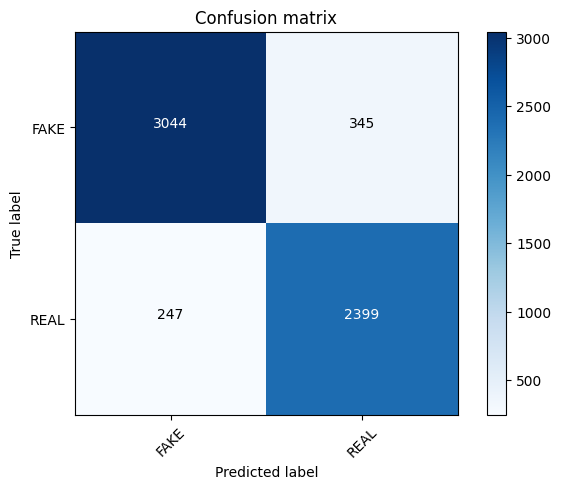

In [88]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,classes = ["FAKE","REAL"])

In [89]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.902


### Passive Aggressive Classifier Algorithm - works well with text data

The Passive Aggressive Classifier algorithm is used for large-scale learning. It is especially useful for situations where there is a lot of data and it is continually evolving. The algorithm updates itself passively when it predicts correctly, but becomes aggressive in updating its weights when a mistake is made, hence the name. This makes it suitable for scenarios where the data changes frequently, like real-time prediction systems.

In [90]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.918
Confusion matrix, without normalization


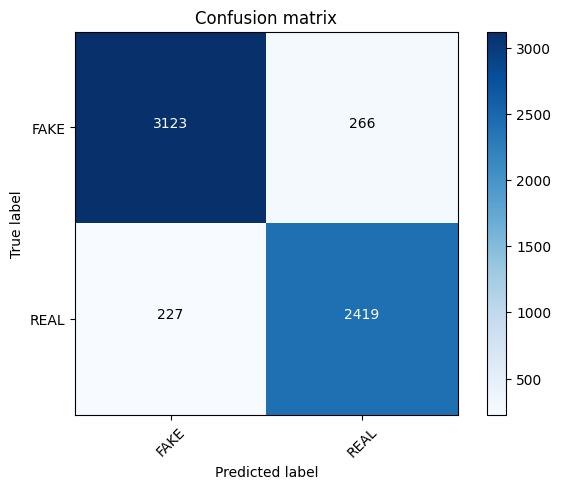

In [91]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,classes = ["FAKE","REAL"])

### Multinomial Classifier with Hyperparameter

The Multinomial Classifier with Hyperparameter tuning is a type of Naive Bayes classifier used primarily for document classification, where features are typically the counts of words or frequencies appearing in a document. This classifier adjusts its behavior based on hyperparameters—settings that are not learned from the data but set before training begins. Hyperparameter tuning involves finding the most optimal parameters for the model, such as the smoothing parameter, to improve performance or accuracy on specific types of data, like text or emails.

In [92]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train, y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  if score > previous_score:
    classifier = sub_classifier
  print("Alpha: {}, Score: {}".format(alpha, score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.8903065451532726
Alpha: 0.1, Score: 0.9020712510356255
Alpha: 0.2, Score: 0.9025683512841757
Alpha: 0.30000000000000004, Score: 0.9024026512013256
Alpha: 0.4, Score: 0.9017398508699255
Alpha: 0.5, Score: 0.9015741507870754
Alpha: 0.6000000000000001, Score: 0.9022369511184756
Alpha: 0.7000000000000001, Score: 0.9025683512841757
Alpha: 0.8, Score: 0.9015741507870754
Alpha: 0.9, Score: 0.9017398508699255


In [93]:
## Get feature names
feature_names = cv.get_feature_names_out()

In [94]:
feature_names

array(['abandon', 'abc', 'abc news', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

In [95]:
classifier

MultinomialNB(alpha=0.9)

In [96]:
classifier.feature_log_prob_[0]

array([ -9.06056227,  -9.06056227, -10.28838629, ...,  -9.99212048,
       -11.45845755,  -9.42157562])

In [97]:
##Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-2.9468577463990755, 'new'),
 (-2.994219848520549, 'time'),
 (-3.000566240637532, 'york'),
 (-3.0008020674474167, 'new york'),
 (-3.014815217142134, 'york time'),
 (-3.014815217142134, 'new york time'),
 (-3.9648310157438633, 'breitbart'),
 (-4.004573851696944, 'trump'),
 (-5.2756841712452855, 'donald'),
 (-5.282590276041697, 'donald trump'),
 (-5.755045510465673, 'say'),
 (-5.992274458590198, 'obama'),
 (-6.016039835625665, 'clinton'),
 (-6.106599412671392, 'presid'),
 (-6.122523316028115, 'state'),
 (-6.177512429323892, 'report'),
 (-6.188882648465076, 'attack'),
 (-6.253840544739848, 'hous'),
 (-6.259960514881633, 'brief'),
 (-6.316793989644799, 'hillari')]

In [98]:
### Most fake
sorted(zip(classifier.feature_log_prob_[1], feature_names))[:50]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596